In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

Read the data 

In [2]:
df=pd.read_csv("C:\\Users\\LENOVO\\Downloads\\AB_NYC_2019.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# **Here are sixteen feature in the New York City Airbnb Open Data-set:**

Id : Listing ID of the property

Name : Name of the listed property.

host_id : ID of the property owner
.
host_name : Name of the property owner.

neighbourhood_group : Location at which property located.

Neighbourhood : Area in which property located.

Latitude : Latitude coordinate.

Longitude : Longitude coordinate.

room_type : Type of the room (Entire Home/ Appt, Private Room, Shared Room)

Price : Price in Dollars.

Minimum_nights : Amounts of minimum night stay at property

number_of_reviews : No. Of reviews

last_review : last review on which date.

reviews_per_month : Numbers of reviews per months.

calculated_host_listings_count : Count of properties listed on that host.

availability_365 : Number of days when listing is available for booking


In [3]:
#check the columns 
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [6]:
#Number of rows before removing duplicate
df.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [7]:
#checking of duplicated values
df.duplicated().sum()

np.int64(0)

**NO duplicates are present**

In [8]:
#Checking for the missing values 
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
#Imputing the null value
df['name'].fillna('No Name provided', inplace=True)



In [10]:
df['host_name'].fillna('No host Name provided', inplace=True)

In [11]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
#Replace with median for realistic range of date 
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['last_review'].fillna(df['last_review'].median(), inplace=True)

In [13]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: xlabel='price'>

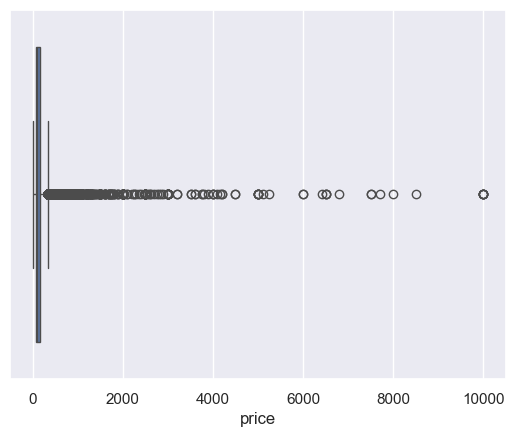

In [14]:
sns.boxplot(x=df['price'])

In [15]:
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace=True)

In [16]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**No missing Values**

In [17]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-19,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


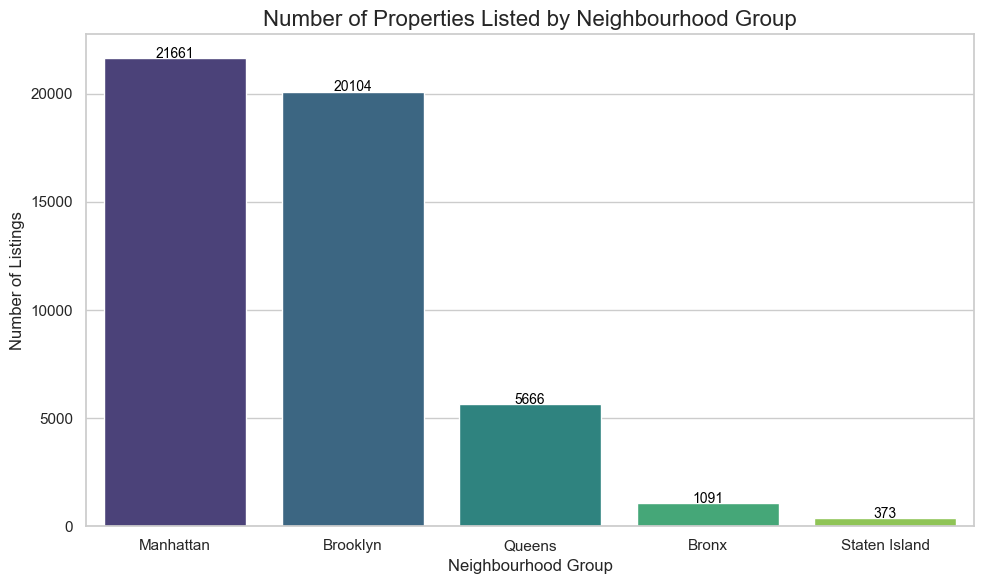

In [18]:
# Find the neighbourhood group with the maximum number of properties listed
neighbourhood_group_counts = df['neighbourhood_group'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
av=sns.barplot(x=neighbourhood_group_counts.index, y=neighbourhood_group_counts.values, palette="viridis")
for i, v in enumerate(neighbourhood_group_counts.values):
    av.text(i, v + 1, str(v), color='black', ha='center', fontsize=10)
plt.title("Number of Properties Listed by Neighbourhood Group", fontsize=16)
plt.xlabel("Neighbourhood Group", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.tight_layout()
plt.show()

**The neighbourhood group with the maximum number of properties listed is Manhattan and Brooklyn**

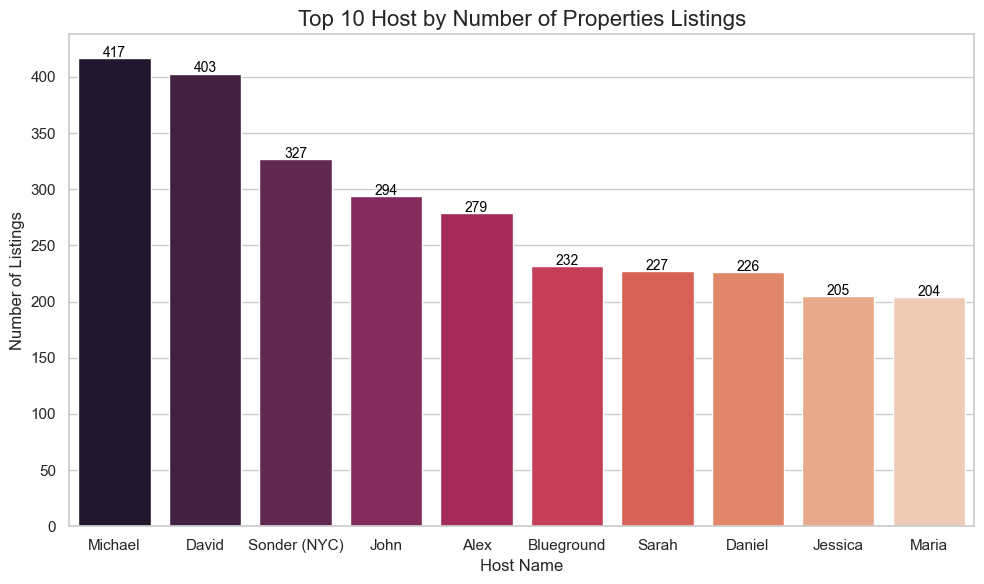

In [19]:
# Find Which host has maximum number of properties listed ?
host_name=df['host_name'].value_counts().head(10)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=host_name.index, y=host_name.values, palette="rocket")
for i, v in enumerate(host_name.values):
    ax.text(i, v + 1, str(v), color='black', ha='center', fontsize=10)
plt.title("Top 10 Host by Number of Properties Listings", fontsize=16)
plt.xlabel("Host Name", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.tight_layout()
plt.show()

**The host has maximum number of properties listed are Michael,david ,Songer(NYC),John,Alex,Blueground,Sarah,Daniel,Jessica,Maria**

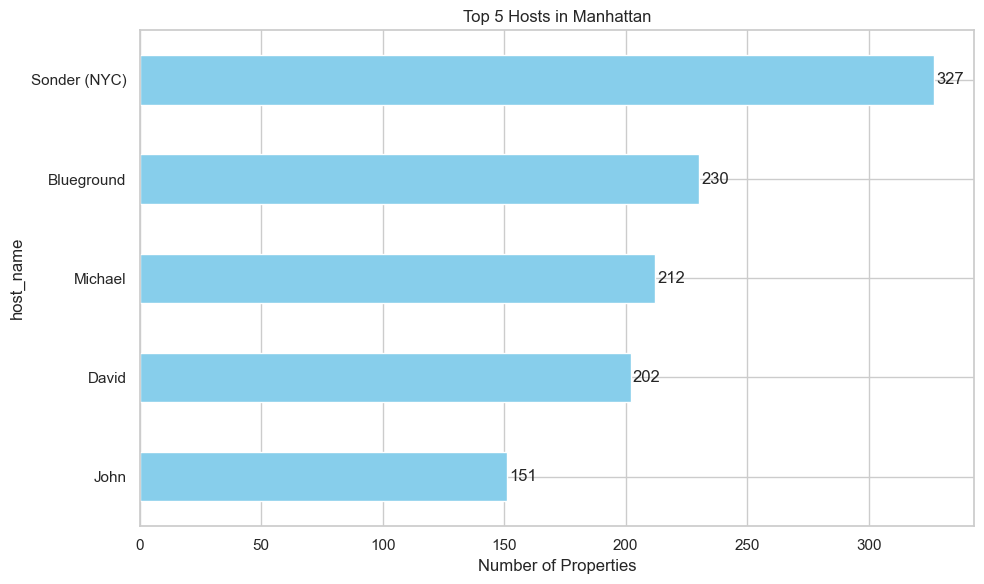

In [20]:
# Host with max properties in top neighbourhood group
neighbourhood_counts = df['neighbourhood_group'].value_counts()
top_neighbourhood = neighbourhood_counts.index[0]
top_hosts_in_top_neighbourhood = df[df['neighbourhood_group'] == top_neighbourhood].groupby('host_name')['id'].count().sort_values(ascending=False).head()
plt.figure(figsize=(10, 6))
aw=top_hosts_in_top_neighbourhood.sort_values().plot(kind='barh', color='skyblue')
for index, value in enumerate(top_hosts_in_top_neighbourhood.sort_values()):
    plt.text(value + 1, index, str(value), va='center')
plt.xlabel("Number of Properties")
plt.title(f"Top 5 Hosts in {top_neighbourhood}")
plt.tight_layout()
plt.show()

**The most listing number of properties in Manhattan with host name  Sonder(NYC).**

In [21]:
avg_price=df.groupby('room_type')['price'].mean()
print('\
    Average Price by Room Type:')
print(avg_price)


    Average Price by Room Type:
room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64


**The Avergae Price by Room Type for Entire Home/apt  is 211.79$ ,for Private Room is  89.79$,for Shared Room is 70.12$**

In [22]:
room_by_neig=pd.crosstab(df['neighbourhood_group'],df['room_type'])
print('\
    Room type by Neighourhood Group')
print(room_by_neig)

    Room type by Neighourhood Group
room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            379           652           60
Brooklyn                        9559         10132          413
Manhattan                      13199          7982          480
Queens                          2096          3372          198
Staten Island                    176           188            9


**The Most prefered room type in every neighbourhood group is Entire Home/apt and Private room** 

In [23]:
ava_room=df.groupby('room_type')['availability_365'].sum()
print('\
    Total Availability by Room type')
print(ava_room)

    Total Availability by Room type
room_type
Entire home/apt    2843783
Private room       2482739
Shared room         187921
Name: availability_365, dtype: int64


**The Entire home/pt have the higher total availability**

In [31]:
busiest_property = df.nlargest(1, 'number_of_reviews')[['name','host_name', 'number_of_reviews']]
print("\
    Property with Maximum Reviews:")
print(busiest_property)

    Property with Maximum Reviews:
                          name host_name  number_of_reviews
11759  Room near JFK Queen Bed      Dona                629


**Dona’s property “Room near JFK Queen Bed” has the most reviews.**

In [25]:
Reviews_per_mon=df['reviews_per_month'].describe()
print('\
    Reviews Per Month Statistics')
print(Reviews_per_mon)

    Reviews Per Month Statistics
count    48895.000000
mean         1.238930
std          1.520861
min          0.010000
25%          0.280000
50%          0.720000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64


**The Maximum reviews per month is 58.50 and the average is 1.2 well the minimum reviews per is 0**.

In [26]:
room_type=df['room_type'].value_counts()
print("\
    Total Room Type Count")
print(room_type)

    Total Room Type Count
room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64


**The Count for Entire Home/apt is 25409,Private room 22326 and Shared room is 1160.**

In [27]:
price_by_neighborhood = df.groupby('neighbourhood_group')['price'].agg(['mean', 'median', 'count'])
print("\
    Price Analysis by Neighborhood Group")
print(price_by_neighborhood)

    Price Analysis by Neighborhood Group
                           mean  median  count
neighbourhood_group                           
Bronx                 87.496792    65.0   1091
Brooklyn             124.383207    90.0  20104
Manhattan            196.875814   150.0  21661
Queens                99.517649    75.0   5666
Staten Island        114.812332    75.0    373


**The Maximum average price for Manhattan is 196.87 which is highest amoungs all and the minimum average price for Bronx is 87.47 which is least amoungs all .**

In [28]:
# saving the dataframe
df.to_csv(r'C:\\Users\\LENOVO\\Downloads\\AB_NYC_2019(1).csv')